In [1]:
# importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading and configuring data

data = pd.read_csv('../data1.txt', header = None)
X = np.array(data.values[:,0]).reshape((-1,1))
y = np.array(data.values[:,1]).reshape((-1,1))
X = np.hstack((np.ones_like(X),X))

print("Data:: \n")
print(data.head())
print("\nX:: \n\n", X[:5,:])
print(X.shape)
print("\ny:: \n\n", y[:5])
print(y.shape)


Data:: 

        0        1
0  6.1101  17.5920
1  5.5277   9.1302
2  8.5186  13.6620
3  7.0032  11.8540
4  5.8598   6.8233

X:: 

 [[1.     6.1101]
 [1.     5.5277]
 [1.     8.5186]
 [1.     7.0032]
 [1.     5.8598]]
(97, 2)

y:: 

 [[17.592 ]
 [ 9.1302]
 [13.662 ]
 [11.854 ]
 [ 6.8233]]
(97, 1)


In [12]:
print(data.info())
print('\n\n')
print(data.head())
print('\n\n')
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
0    97 non-null float64
1    97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB
None



        0        1
0  6.1101  17.5920
1  5.5277   9.1302
2  8.5186  13.6620
3  7.0032  11.8540
4  5.8598   6.8233





,0,1
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [3]:
# Splitting dataset into trianing and testing set

m = y.size
m_train = round(m * 0.7)

indices  = np.random.permutation(m)

X_train = X[indices[:m_train], :]
y_train = y[indices[:m_train], :]

X_test = X[indices[m_train:], :]
y_test = y[indices[m_train:], :]


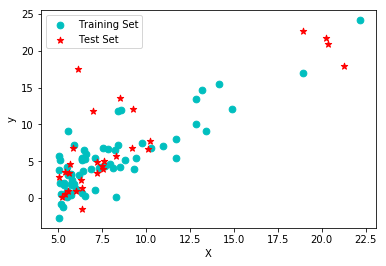

In [4]:
# Visualizing the data

plt.scatter(X_train[:,1], y_train, color = 'c', s = 45, label = 'Training Set')
plt.scatter(X_test[:,1], y_test, marker = '*',color = 'r', s = 45, label = 'Test Set')

plt.xlabel('X')
plt.ylabel('y')
plt.legend(loc = 'best')

plt.show()

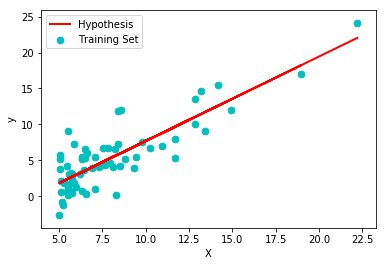

In [5]:
# Normal Equation method for finding Theta

Theta = (np.linalg.inv(X_train.T @ X_train)) @ (X_train.T @ y_train)

# plotting our trained hypothesis

plt.plot(X_train[:,1] , X_train @ Theta, linewidth = 2, color='r', label = 'Hypothesis')
plt.scatter(X_train[:,1], y_train, color = 'c', s = 45, label = 'Training Set')


plt.xlabel('X')
plt.ylabel('y')
plt.legend(loc = 'best')
plt.show()


Prediction Error::  15.829065399926304
Variance score::  68.60101994619224
R2 score::  66.06730055242396


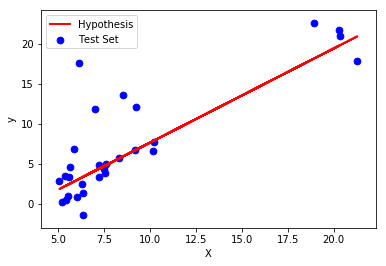

In [18]:
from sklearn.metrics import explained_variance_score,r2_score
# Prediction error on test set

predict = X_test @ Theta

RMSE = np.mean((predict - y_test)**2)

print("Prediction Error:: ", RMSE)

print('Variance score:: ', explained_variance_score(y_test,predict)*100)
print('R2 score:: ', r2_score(y_test,predict)*100)

plt.plot(X_test[:,1] , predict, linewidth = 2, color='r', label = 'Hypothesis')
plt.scatter(X_test[:,1], y_test, color = 'b', s = 45, label = 'Test Set')


plt.xlabel('X')
plt.ylabel('y')
plt.legend(loc = 'best')
plt.show()

``@Nikhil_Chigali``